In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
flight_w22= pd.read_csv('flights_weather2022.csv')

flight22= pd.read_csv('flights2022.csv')


In [3]:
flight_w22.head(2)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0


In [4]:
flight22.head(2)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.


In [5]:
flight_w22.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'airline', 'route', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed',
       'wind_gust', 'precip', 'pressure', 'visib'],
      dtype='object')

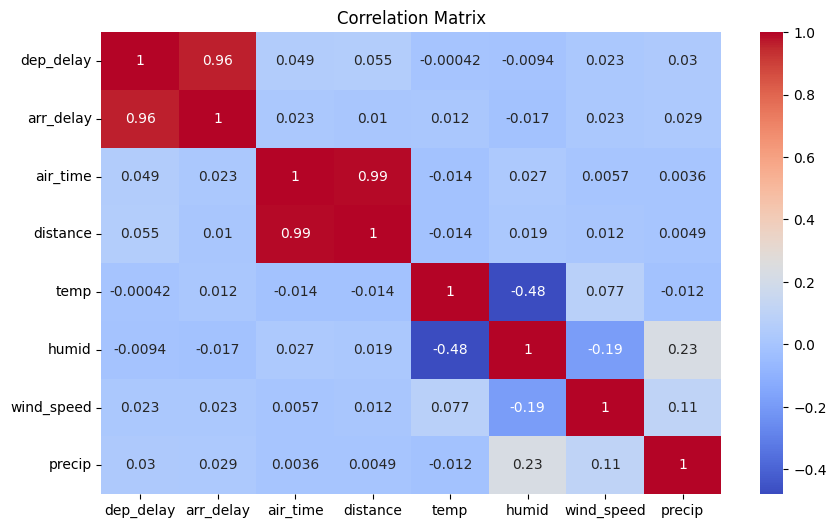

In [6]:
correlation = flight_w22[['dep_delay', 'arr_delay', 'air_time', 'distance', 'temp', 'humid', 'wind_speed', 'precip']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='distance', ylabel='arr_delay'>

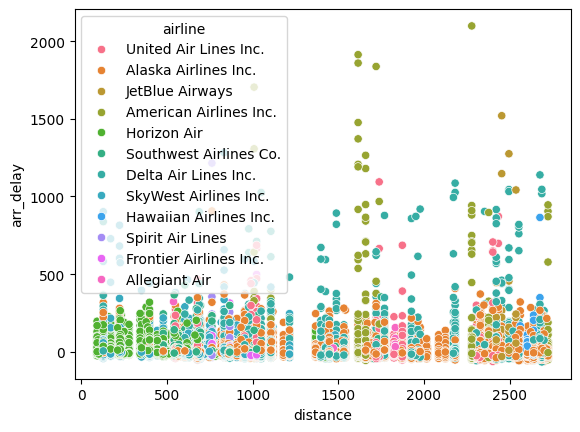

In [7]:
sns.scatterplot(x='distance', y='arr_delay', hue='airline', data=flight_w22)

# ✅ Step-by-Step Feature Engineering + Relationship Analysis

In [8]:
print(flight_w22.dtypes)

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
airline            object
route              object
temp              float64
dewp              float64
humid             float64
wind_dir          float64
wind_speed        float64
wind_gust         float64
precip            float64
pressure          float64
visib             float64
dtype: object


In [9]:
df=flight_w22

## hange the data types accordingly columns data 

In [10]:

# Convert year, month, day, hour, minute into datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])

# Convert dep_time, sched_dep_time, arr_time, sched_arr_time to datetime format
time_cols = ['dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time']
for col in time_cols:
    df[col] = pd.to_datetime(df[col], format='%H%M', errors='coerce').dt.time

# Convert flight to string (if needed)
df['flight'] = df['flight'].astype(str)

# Convert tailnum to string
df['tailnum'] = df['tailnum'].astype(str)

# Convert carrier and airline to categorical
df['carrier'] = df['carrier'].astype('category')
df['airline'] = df['airline'].astype('category')

# Convert dep_delay, arr_delay, air_time, distance to numeric (float or int)
numeric_cols = ['dep_delay', 'arr_delay', 'air_time', 'distance']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Convert origin, dest, route to string or categorical
df['origin'] = df['origin'].astype(str)
df['dest'] = df['dest'].astype(str)
df['route'] = df['route'].astype(str)

# Optionally, convert origin, dest, route to categorical if needed
df['origin'] = df['origin'].astype('category')
df['dest'] = df['dest'].astype('category')
df['route'] = df['route'].astype('category')

# Display the updated DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111006 entries, 0 to 111005
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   year            111006 non-null  int64         
 1   month           111006 non-null  int64         
 2   day             111006 non-null  int64         
 3   dep_time        108328 non-null  object        
 4   sched_dep_time  110987 non-null  object        
 5   dep_delay       108566 non-null  float64       
 6   arr_time        107215 non-null  object        
 7   sched_arr_time  110571 non-null  object        
 8   arr_delay       108332 non-null  float64       
 9   carrier         111006 non-null  category      
 10  flight          111006 non-null  object        
 11  tailnum         111006 non-null  object        
 12  origin          111006 non-null  category      
 13  dest            111006 non-null  category      
 14  air_time        108332 non-null  flo

In [11]:
# Ensure sched_dep_time and sched_arr_time remain integers
df['sched_dep_time'] = pd.to_numeric(df['sched_dep_time'], errors='coerce')
df['sched_arr_time'] = pd.to_numeric(df['sched_arr_time'], errors='coerce')

# Extract scheduled departure and arrival hours
df['scheduled_dep_hour'] = df['sched_dep_time'] // 100
df['scheduled_arr_hour'] = df['sched_arr_time'] // 100

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111006 entries, 0 to 111005
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   year                111006 non-null  int64         
 1   month               111006 non-null  int64         
 2   day                 111006 non-null  int64         
 3   dep_time            108328 non-null  object        
 4   sched_dep_time      0 non-null       float64       
 5   dep_delay           108566 non-null  float64       
 6   arr_time            107215 non-null  object        
 7   sched_arr_time      0 non-null       float64       
 8   arr_delay           108332 non-null  float64       
 9   carrier             111006 non-null  category      
 10  flight              111006 non-null  object        
 11  tailnum             111006 non-null  object        
 12  origin              111006 non-null  category      
 13  dest                111006 no

In [12]:
# Extract part of day
def get_part_of_day(hour):
    if 5 <= hour < 12: return 'morning'
    elif 12 <= hour < 17: return 'afternoon'
    elif 17 <= hour < 21: return 'evening'
    else: return 'night'

df['part_of_day'] = df['scheduled_dep_hour'].apply(get_part_of_day)

# Weekend indicator
df['is_weekend'] = df['flight_date'].dt.dayofweek >= 5

KeyError: 'flight_date'

# 🔍 Relationship Analysis:
## - Delay vs part of day

In [ ]:
plt.figure(figsize=(10, 6))

# Use hue to compare Weekend vs Weekday
sns.boxplot(x='part_of_day', y='dep_delay', hue='is_weekend', data=df, palette='Set2')

# Add jittered data points for individual delays
sns.stripplot(x='part_of_day', y='dep_delay', hue='is_weekend', data=df, 
              dodge=True, jitter=True, alpha=0.3, palette='dark:black')

plt.title("Departure Delay by Part of Day (Weekend vs Weekday)")
plt.xlabel("Part of Day")
plt.ylabel("Departure Delay (minutes)")
plt.legend(title="Is Weekend", labels=["Weekday", "Weekend"])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## ⏱️ Delays & Time Features


In [ ]:
# Delay categories 
df['delay_level'] = pd.cut(df['arr_delay'], 
                           bins=[-np.inf, 0, 15, 60, np.inf], 
                           labels=['early_or_ontime', 'short_delay', 'moderate_delay', 'long_delay'])

                         # speed of flights (distance per air_time in minutes)
df['avg_speed']=df['distance']/df['air_time']
df.info()


## 🔍 Relationship Analysis:

In [ ]:
sns.boxplot(x='delay_level',y='avg_speed',data=df)
plt.title("Delay level vs Average Speed")

sns.scatterplot(x='distance',y='arr_delay',data=df)
plt.title("Distance vs Arrival Delay")

In [ ]:
df.columns

In [ ]:
sns.boxplot(x='humid', y='dep_delay', data=df)
plt.title("Severe Weather vs Departure Delay")

sns.boxplot(x='wind_dir', y='arr_delay', data=df)
plt.title("Wind Category vs Arrival Delay")


In [ ]:
null_columns = df.columns[df.isnull().any()]
print(null_columns)

In [ ]:
df.columns

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Separate columns by type
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Fill numeric with median
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Fill categorical with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [ ]:
# Fill missing numeric columns with median
df['wind_speed'].fillna(df['wind_speed'].median(), inplace=True)

# Fill missing categorical columns with most frequent value
df['carrier'].fillna(df['carrier'].mode()[0], inplace=True)

In [ ]:
# Drop rows with any missing values (not always recommended)
df.dropna(inplace=True)

# OR drop columns with >50% missing values
df.dropna(thresh=len(df)*0.5, axis=1, inplace=True)


In [ ]:
df.isna().sum()

### - Flight Information:

year, month, day, datetime

dep_time, sched_dep_time, dep_delay

arr_time, sched_arr_time, arr_delay

carrier, flight, tailnum, origin, dest

air_time, distance

hour, minute (likely scheduled departure)

airline, route

scheduled_dep_hour, scheduled_arr_hour, part_of_day

### - Weather Information:

temp, dewp (dew point), humid (humidity)

wind_dir, wind_speed, wind_gust

precip (precipitation), pressure, visib (visibility)

## 🗓️ 1. Day of Week

In [ ]:
df['day_of_week'] = df['datetime'].dt.day_name()
df['day_of_week'].unique()

In [ ]:
df['datetime'].unique()

## 🌦️ 2. Season (based on month)

In [ ]:
def get_session(month):
    if month in [12,1,2]:
        return 'winter'
    elif month in [3,4,5]:
        return 'spring' 
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Autumn'
df['session']=df['datetime'].dt.month.apply(get_session)  
df['session'].unique()

## 📅 3. Is Weekend Flag


In [ ]:
df['is_weeked']= df['datetime'].dt.dayofweek >=5
df['is_weeked'].unique()

## ⏱️ 4. Flight Duration (in minutes

In [ ]:
df['dep_datetime']= pd.to_datetime(df['datetime'].astype(str)+df['dep_time'].astype(str).str.zfill(4),format='%Y%m%d%H%M')
df['arr_datetime']= pd.to_datetime(df['datetime'].astype(str)+df['arr_time'].astype(str).str.zfill(4),format='%Y%m%d%H%M')


# Adjust for overnight flight 
df.loc[df['arr_datetime'] < df['dep_datetime'],'arr_datetime'] += pd.Timedelta(days=1)

df['flight_duration'] = (df['arr_datetime'] - df['dep_datetime']).dt.total_seconds()/60
df['flight_duration'] = (df['arr_datetime'] - df['dep_datetime']).dt.total_seconds()/60

## 🌅 5. Time of Day Categor


In [ ]:
def categorize_time(hour):
    if 5<= hour< 8:
        return 'Early Morning'
    elif 8<=hour <12:
        return 'Morning'
    elif 12<= hour <17:
        return 'Afternoon'
    elif 17<=hour<21:
        return 'Evening'
    else:
        return 'night'

df['time_of_day']=df['dep_datetime'].dt.hour.apply(categorize_time)

In [ ]:
df.columns

# ✈️ 1. **Route Popularit**
- ### Create a combined route identifier


In [ ]:
# Create a combined route identifier
df['route'] = df['origin'].astype(str) + '-' + df['dest'].astype(str)

# Count the flights per route
route_counts = df.groupby('route').size().rename('route_popularity')
df = df.merge(route_counts, left_on='route', right_index=True, how='left')

# **🏢 2. Carrier Delay Stat**

In [ ]:
carrier_delay = df.groupby('carrier')['arr_delay'].mean().rename('avg_carrier_arr_delay')
df=df.merge(carrier_delay,on='carrier',how='left')

### 🛫 3. Airport Delay Stat

In [ ]:
# Origin airport delay
origin_delay = df.groupby('origin')['dep_delay'].mean().rename('avg_origin_dep_delay')
df = df.merge(origin_delay, on='origin', how='left')

# Destination airport delay
dest_delay = df.groupby('dest')['arr_delay'].mean().rename('avg_dest_arr_delay')
df = df.merge(dest_delay, on='dest', how='left')

## 🛩️ 4. Aircraft Delay Stat

In [ ]:
aircraft_delay = df.groupby('tailnum')['arr_delay'].mean().rename('avg_tailnum_arr_delay')
df=df.merge(aircraft_delay,on='tailnum',how='left')

## 🔁 5. Connection Flag

In [ ]:
# Sort by aircraft and time
df = df.sort_values(by=['tailnum', 'datetime', 'dep_time'])

# Get next origin and next departure time
df['next_origin'] = df.groupby('tailnum')['origin'].shift(-1)
df['next_dep_time'] = df.groupby('tailnum')['dep_time'].shift(-1)

# Fix: Convert categorical to string for safe comparison
df['connection_flag'] = (df['dest'].astype(str) == df['next_origin'].astype(str))
